# Car Price Prediction

## Data Cleaning & Preprocessing (1–15)

### 1. Load the dataset into a Pandas DataFrame and display the first 5 rows.
 

In [2]:
import pandas as pd
import numpy as np

car = pd.read_csv("cardekho.csv")
car.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


#### Explain what each column means in your own words.
1. **name** – The full model name of the car, including the brand and variant.

2. **year** – The year the car was manufactured.

3. **selling_price** – The amount (in Indian Rupees) the car is being sold for.

4. **km_driven** – The total distance the car has been driven, measured in kilometers.

5. **fuel** – The type of fuel the car uses (e.g., Petrol, Diesel, CNG).

6. **seller_type** – Who is selling the car, such as an individual, dealer, or a trusted dealer.

7. **transmission** – Whether the car has a manual or automatic gearbox.

8. **owner** – The ownership history (first owner, second owner, etc.).

9. **mileage(km/ltr/kg)** – The distance the car can travel per unit of fuel, in kilometers per liter (or per kg for CNG).

10. **engine** – The engine capacity in cubic centimeters (cc).

11. **max_power** – The maximum power the engine can produce, measured in brake horsepower (bhp).

12. **seats** – The number of passenger seats in the car.


### 2. Check for missing values in the dataset.
 Show both the number of missing values per column and the percentage.

In [3]:
# checking for missing value in the dataset
missing_count = car.isnull().sum()
missing_percentage = (missing_count / len(car)) * 100

#combining both into a dataframe
missing_car = pd.DataFrame({
    "Missing Value": missing_count,
    "Percentage(%)": missing_percentage
})

print(missing_car)

                    Missing Value  Percentage(%)
name                            0       0.000000
year                            0       0.000000
selling_price                   0       0.000000
km_driven                       0       0.000000
fuel                            0       0.000000
seller_type                     0       0.000000
transmission                    0       0.000000
owner                           0       0.000000
mileage(km/ltr/kg)            221       2.718996
engine                        221       2.718996
max_power                     215       2.645177
seats                         221       2.718996


#### 3. Drop any rows where the target variable (selling price) is missing.
 Explain why we can’t train a model with missing target values.


In [4]:
# Droping rows where the target variable 'selling_price' is missing
car_cleaned = car.dropna(subset=["selling_price"])

#Confirming no missing target variable remaining
print(car_cleaned["selling_price"].isnull().sum())

0


##### Why we can’t train a model with missing target values:
The target variable is what we are trying to predict. If it’s missing for some rows, the model has no answer to learn from for those examples. Including such rows would confuse the learning process because the model wouldn’t know the correct output to match with the input features.

#### 4. Fill missing values in the “mileage” column with the column’s mean.
 Explain why filling missing values can sometimes be better than dropping rows

In [5]:
#Filling missing values in mileage column with the mean
car_cleaned["mileage(km/ltr/kg)"] = car_cleaned["mileage(km/ltr/kg)"].fillna(
    car_cleaned["mileage(km/ltr/kg)"].mean())

#Checking if there are still missing
print(car_cleaned["mileage(km/ltr/kg)"].isnull().sum())


0


#### Why filling missing values can be better than dropping rows:
Dropping rows removes data from the dataset, which can reduce the amount of information available to train the model, especially if many rows are affected. Filling missing values keeps all the remaining features and patterns in the dataset intact. While it introduces some estimation error, it often results in better model performance than training on a smaller dataset.

#### 5. Remove duplicate rows from the dataset.
 Explain how duplicate rows can affect model training.


In [6]:
#removing duplicate columns
car_cleaned = car_cleaned.drop_duplicates()

#confirming number of rows remaining
print(car_cleaned.shape)

(6926, 12)


#### Why duplicate rows can affect model training:
- Duplicate rows make certain data points appear more often than others, which can bias the model.
- It’s like telling the model “this example is extra important” just because it appears multiple times.
- This can cause:

    - **Overfitting** – the model memorizes repeated examples instead of learning general patterns.

    - **Skewed feature importance** – features in duplicated rows may seem more predictive than they really are.

    - **Wasted computation** – training takes longer without adding new information.

#### 6. Convert the “year” column into the car’s age.
 Example: If the car’s year is 2015 and the current year is 2025, the age is 10 years

In [7]:
from datetime import datetime

#getting current year
current_year = datetime.now().year

#creating a new column called car_age
car_cleaned["car_age"] = current_year - car_cleaned["year"]

#checking the first few rows
print(car_cleaned["car_age"].head())

0    11
1    11
2    19
3    15
4    18
Name: car_age, dtype: int64


#### 7. Check the unique values in the “fuel type” column.
 Explain why knowing all possible values in a categorical column is important before encoding.


In [8]:
#unique values of fule type column
print(car_cleaned["fuel"].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']


#### Why this is important before encoding:

- **Avoids missing categories** – If we don’t check, some categories might be skipped and incorrectly encoded.

- **Prevents errors** – Encoding functions (like OneHotEncoder or LabelEncoder) need to know all categories in advance.

- **Improves consistency** – Ensures the same mapping is used in training and future predictions.

- **Handles unexpected values** – Helps spot typos, rare categories, or inconsistent naming before modeling.

### 8. Replace inconsistent values in the “transmission” column.
 For example, replace “manual” and “Manual” with “Manual” (consistent casing).


In [9]:
#Standardizing casing in transmission column
car_cleaned["transmission"] = car_cleaned["transmission"].str.capitalize()

#Checking unique values after cleaning
print(car_cleaned["transmission"].unique())

['Manual' 'Automatic']


### 9. Check if there are any outliers in the “selling price” column using a boxplot.
 Explain why outliers can affect model accuracy.

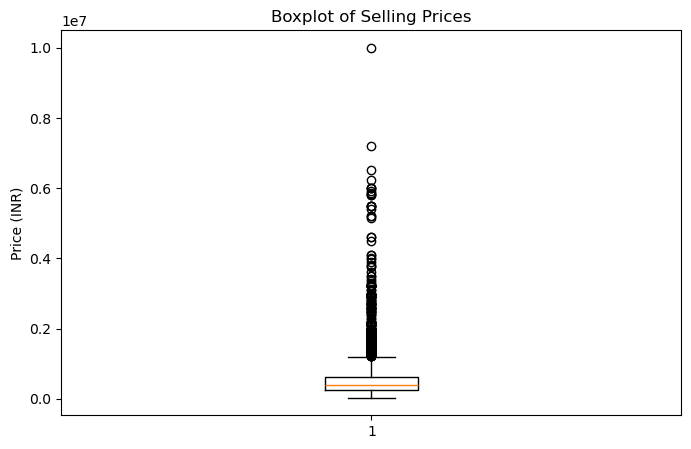

In [10]:
import matplotlib.pyplot as plt

#plotting boxplot
plt.figure(figsize=(8,5))
plt.boxplot(car_cleaned["selling_price"])
plt.title("Boxplot of Selling Prices")
plt.ylabel("Price (INR)")
plt.show()

#### Why outliers can affect model accuracy:

- **Distorted training** – Models like linear regression can be pulled towards extreme values, skewing predictions.

- **Increased error** – Predictions for normal cases may become less accurate because the model tries to fit extreme points.

- **Misleading feature importance** – Outliers can exaggerate or hide relationships between variables.

- **Longer training times** – Some algorithms take longer to converge when extreme values are present.

### 10. Remove cars that are priced below 10,000 or above 5,000,000 (possible outliers).
 Explain why setting realistic price limits can help improve model performance.


In [11]:
#Removing outliners based on car price ranges
car_cleaned = car_cleaned[
    (car_cleaned["selling_price"] >= 10000) &
    (car_cleaned["selling_price"] <= 5000000)
]

#Checking new dataset shape
print(car_cleaned.shape)

(6906, 13)


#### Why setting realistic price limits helps:

- **Removes data entry errors** – Typos or incorrect units (e.g., missing zeros) won’t mislead the model.

- **Reduces noise** – Extreme prices often don’t follow the same patterns as typical cars, so removing them improves learning.

- **Improves generalization** – The model focuses on realistic price ranges it’s more likely to encounter in real-world predictions.

- **Faster training** – Less noisy data means algorithms converge quicker and with better accuracy.

### 11. Standardize the column names so they are all lowercase and contain underscores instead of spaces.


In [12]:
#Standardizing column names
car_cleaned.columns = car_cleaned.columns.str.strip().str.lower().str.replace(" ", "_")

# Checking the updated columns
print(car_cleaned.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'car_age'],
      dtype='object')


### 12. Check if any numerical columns are stored as strings and convert them to numbers.


In [13]:
#Checking if data structure
car_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6906 non-null   object 
 1   year                6906 non-null   int64  
 2   selling_price       6906 non-null   int64  
 3   km_driven           6906 non-null   int64  
 4   fuel                6906 non-null   object 
 5   seller_type         6906 non-null   object 
 6   transmission        6906 non-null   object 
 7   owner               6906 non-null   object 
 8   mileage(km/ltr/kg)  6906 non-null   float64
 9   engine              6698 non-null   float64
 10  max_power           6701 non-null   object 
 11  seats               6698 non-null   float64
 12  car_age             6906 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 755.3+ KB


In [14]:
# Removing any leading/trailing spaces
car_cleaned['max_power'] = car_cleaned['max_power'].astype(str).str.strip()

# Replacing empty strings with NaN
car_cleaned['max_power'] = car_cleaned['max_power'].replace('', pd.NA)

# Converting to numeric (float first to handle decimals), then to integer
car_cleaned['max_power'] = pd.to_numeric(car_cleaned['max_power'], errors='coerce')

#Rounding or floor to make it integer
car_cleaned['max_power'] = car_cleaned['max_power'].round().astype('Int64')  # keeps NaN as <NA>

# Checking result
print(car_cleaned['max_power'].head(10))
print(car_cleaned['max_power'].dtype)


0     74
1    104
2     78
3     90
4     88
5     82
6     58
7     37
8     67
9     68
Name: max_power, dtype: Int64
Int64


In [15]:
car_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6906 non-null   object 
 1   year                6906 non-null   int64  
 2   selling_price       6906 non-null   int64  
 3   km_driven           6906 non-null   int64  
 4   fuel                6906 non-null   object 
 5   seller_type         6906 non-null   object 
 6   transmission        6906 non-null   object 
 7   owner               6906 non-null   object 
 8   mileage(km/ltr/kg)  6906 non-null   float64
 9   engine              6698 non-null   float64
 10  max_power           6700 non-null   Int64  
 11  seats               6698 non-null   float64
 12  car_age             6906 non-null   int64  
dtypes: Int64(1), float64(3), int64(4), object(5)
memory usage: 762.1+ KB


### 13. Create a new column for “price per kilometer” by dividing the selling price by the mileage.


In [16]:
# Creating new column: price per kilometer
car_cleaned['price_per_km'] = car_cleaned['selling_price'] / car_cleaned['mileage(km/ltr/kg)']

# Checking first few rows
print(car_cleaned[['selling_price', 'mileage(km/ltr/kg)', 'price_per_km']].head())


   selling_price  mileage(km/ltr/kg)  price_per_km
0         450000               23.40  19230.769231
1         370000               21.14  17502.365184
2         158000               17.70   8926.553672
3         225000               23.00   9782.608696
4         130000               16.10   8074.534161


### 14. Ensure the dataset index is properly reset after cleaning.


In [17]:
# Reseting index after cleaning
car_cleaned.reset_index(drop=True, inplace=True)

# Checking first few rows to confirm
print(car_cleaned.head())


                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage(km/ltr/kg)  engine  \
0  Individual       Manual   First Owner               23.40  1248.0   
1  Individual       Manual  Second Owner               21.14  1498.0   
2  Individual       Manual   Third Owner               17.70  1497.0   
3  Individual       Manual   First Owner               23.00  1396.0   
4  Individual       Manual   First Owner               16.10  1298.0   

   max_power  seats  car_age  price_per_km  
0         74    5.0       11  19230.769231  
1        104    5.0       

#### Why this matters:
After dropping rows (e.g., missing values, outliers, duplicates), the index might have gaps.
Resetting the index ensures it’s sequential and clean, making iteration and merging operations less error-prone.

### 15. Save your cleaned dataset as a new CSV file called cleaned_cars.csv.


In [18]:
# Saving cleaned dataset to CSV
car_cleaned.to_csv('cleaned_cars.csv', index=False)

print("Cleaned dataset saved as cleaned_cars.csv")


Cleaned dataset saved as cleaned_cars.csv


## Exploratory Data Analysis (EDA) (16–30)


### 16. Find the average selling price of cars in the dataset.


In [19]:
print(car_cleaned["selling_price"].mean())

501378.18114682887


### 17. Find the most common fuel type in the dataset.


In [20]:
print(car_cleaned["fuel"].mode()[0])

Diesel


### 18. Plot a histogram of the selling prices.

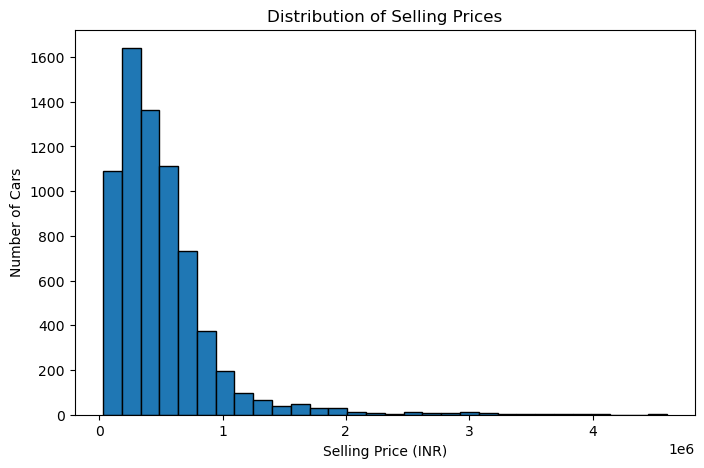

In [21]:
# Plot histogram of selling prices
plt.figure(figsize=(8,5))
plt.hist(car_cleaned['selling_price'], bins=30, edgecolor='black')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price (INR)')
plt.ylabel('Number of Cars')
plt.show()

### 19. Plot the relationship between car age and selling price using a scatter plot.


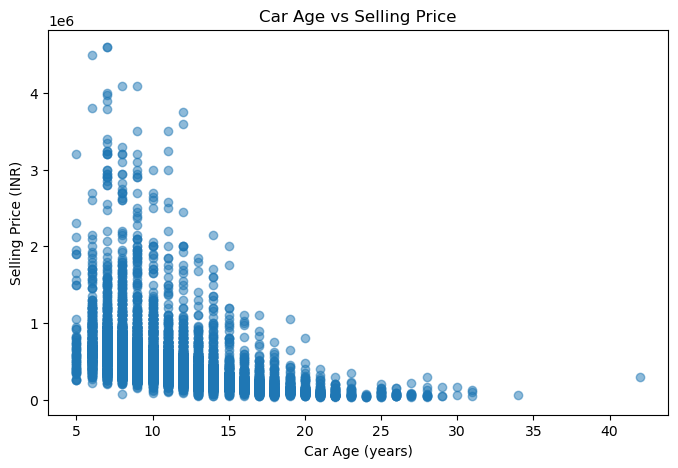

In [22]:
# Scatter plot: Car Age vs Selling Price
plt.figure(figsize=(8,5))
plt.scatter(car_cleaned['car_age'], car_cleaned['selling_price'], alpha=0.5)
plt.title('Car Age vs Selling Price')
plt.xlabel('Car Age (years)')
plt.ylabel('Selling Price (INR)')
plt.show()

### 20. Group cars by fuel type and find the average selling price for each group.


In [23]:
# # Grouping by fuel type and calculate average selling price
avg_price_by_fuel = car_cleaned.groupby("fuel")["selling_price"].mean().reset_index()

print(avg_price_by_fuel)

     fuel  selling_price
0     CNG  300499.946429
1  Diesel  620448.482224
2     LPG  200421.052632
3  Petrol  363717.339629


###  21. Plot a bar chart showing the number of cars per transmission type.


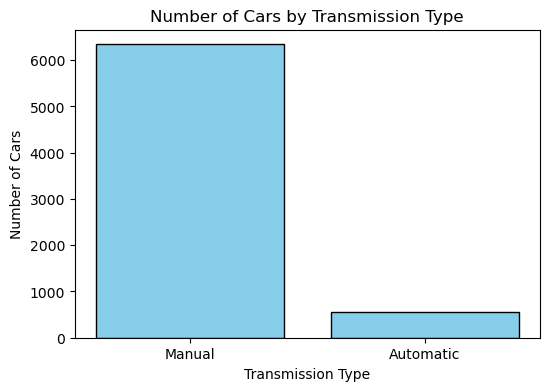

In [24]:
# Count cars per transmission type
transmission_counts = car_cleaned['transmission'].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(transmission_counts.index, transmission_counts.values, color='skyblue', edgecolor='black')
plt.title('Number of Cars by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Cars')
plt.show()


### 22. Find the car with the highest mileage in the dataset.


In [25]:
# Find the row with the highest mileage
highest_mileage_car = car_cleaned.loc[car_cleaned['mileage(km/ltr/kg)'].idxmax()]

print(highest_mileage_car)


name                  Maruti Alto 800 CNG LXI Optional
year                                              2019
selling_price                                   330000
km_driven                                        10000
fuel                                               CNG
seller_type                                 Individual
transmission                                    Manual
owner                                     Second Owner
mileage(km/ltr/kg)                               33.44
engine                                           796.0
max_power                                           40
seats                                              4.0
car_age                                              6
price_per_km                               9868.421053
Name: 35, dtype: object


### 23. Calculate the correlation between mileage and selling price.


In [26]:
# Calculate correlation between mileage and selling price
correlation = car_cleaned['mileage(km/ltr/kg)'].corr(car_cleaned['selling_price'])

print(f"Correlation between Mileage and Selling Price: {correlation:.4f}")


Correlation between Mileage and Selling Price: -0.1207


This gives you a value between -1 and 1:

- **Positive** → Higher mileage tends to be associated with higher prices.

- **Negative** → Higher mileage tends to be associated with lower prices.

- **Close to 0** → Little to no linear relationship.

### 24. Plot a heatmap showing the correlations between all numeric columns.


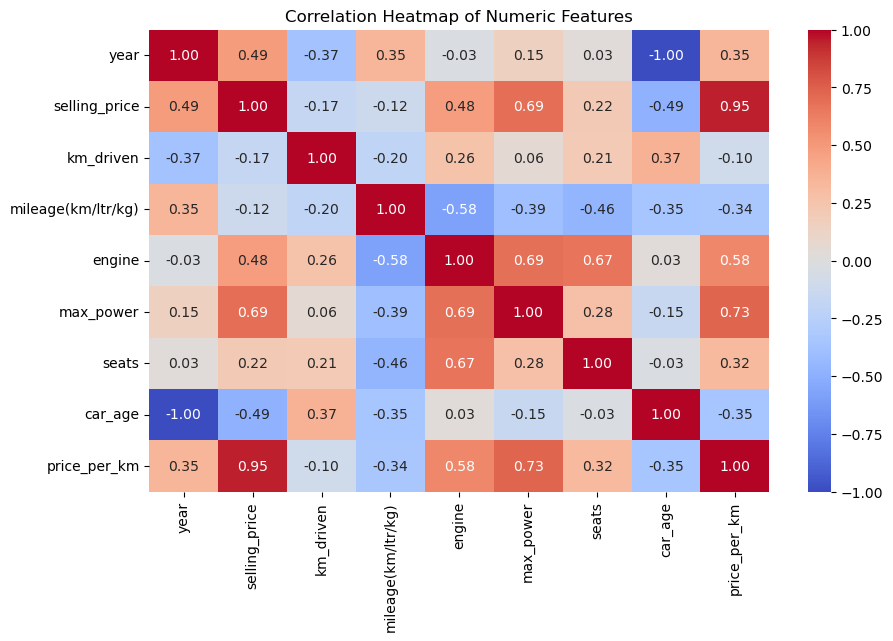

In [27]:
import seaborn as sns

# Calculating correlation matrix for numeric columns
corr_matrix = car_cleaned.corr(numeric_only=True)

# Ploting heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

### 25. Check if manual cars are generally cheaper or more expensive than automatic cars.


In [28]:
# Comparing average prices for each transmission type
avg_price_by_transmission = car_cleaned.groupby('transmission')['selling_price'].mean().reset_index()

print(avg_price_by_transmission)


  transmission  selling_price
0    Automatic   1.143215e+06
1       Manual   4.442991e+05


### 26. Find the average selling price for each year of manufacture.

In [29]:
# Grouping by year and calculate average selling price
avg_price_by_year = car_cleaned.groupby('year')['selling_price'].mean().reset_index()

print(avg_price_by_year)


    year  selling_price
0   1983  300000.000000
1   1991   55000.000000
2   1994   88000.000000
3   1995  107500.000000
4   1996   81666.666667
5   1997   90181.727273
6   1998   73100.000000
7   1999   71470.588235
8   2000   90047.850000
9   2001   47220.333333
10  2002   99153.807692
11  2003   97034.021277
12  2004  109364.250000
13  2005  137994.494505
14  2006  164383.308943
15  2007  174894.505682
16  2008  208397.639024
17  2009  227691.620833
18  2010  273897.334211
19  2011  318335.696751
20  2012  351387.379139
21  2013  451501.724199
22  2014  511858.798623
23  2015  589177.625551
24  2016  653180.339105
25  2017  708006.173913
26  2018  825749.553897
27  2019  795583.291667
28  2020  786548.338710


### 27. Plot a line chart showing the trend of selling prices over the years.


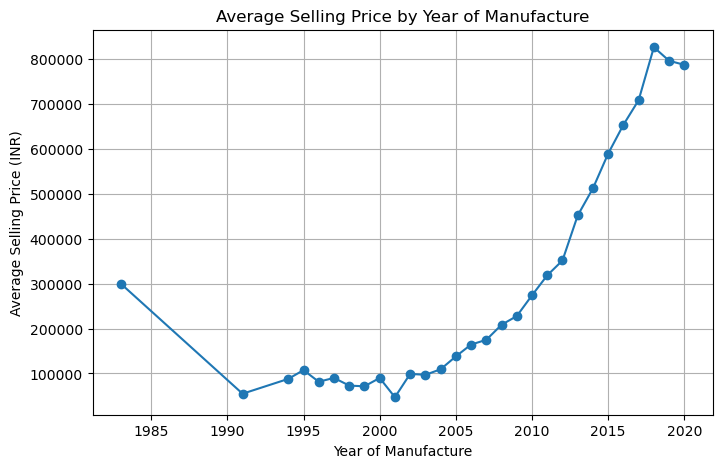

In [30]:
# Grouping by year and calculate average selling price
avg_price_by_year = car_cleaned.groupby('year')['selling_price'].mean().reset_index()

# Ploting line chart
plt.figure(figsize=(8,5))
plt.plot(avg_price_by_year['year'], avg_price_by_year['selling_price'], marker='o')
plt.title('Average Selling Price by Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Average Selling Price (INR)')
plt.grid(True)
plt.show()

### 28. Find the most expensive car for each fuel type.


In [31]:
# Finding the most expensive car for each fuel type
most_expensive_per_fuel = car_cleaned.loc[
    car_cleaned.groupby('fuel')['selling_price'].idxmax()
]

print(most_expensive_per_fuel[['fuel', 'name', 'selling_price']])


        fuel                                      name  selling_price
4961     CNG     Maruti Ertiga VXI CNG Limited Edition         545000
283   Diesel  Mercedes-Benz GL-Class 220d 4MATIC Sport        4600000
2783     LPG               Hyundai i10 Sportz 1.1L LPG         375000
133   Petrol           Jeep Wrangler 2016-2019 3.6 4X4        4100000


### 29. Find out which brand appears most frequently in the dataset.


In [32]:
# Extracting brand name (first word of the car name)
car_cleaned['brand'] = car_cleaned['name'].str.split().str[0]

# Finding the most common brand
most_common_brand = car_cleaned['brand'].mode()[0]

print(f"Most Common Brand: {most_common_brand}")


Most Common Brand: Maruti


### 30. Check the top 5 most common combinations of fuel type and transmission.


In [33]:
# Counting combinations of fuel type and transmission
top_combinations = (
    car_cleaned.groupby(['fuel', 'transmission'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
    .head(5)
)

print(top_combinations)


     fuel transmission  count
2  Diesel       Manual   3457
5  Petrol       Manual   2791
1  Diesel    Automatic    284
4  Petrol    Automatic    280
0     CNG       Manual     56


### Machine Learning (31–40)


31. What are the main assumptions of Linear Regression, and how can you check them using this dataset?
 Explain the assumptions (Linearity, Homoscedasticity, Normality of residuals, No multicollinearity, Independence of errors). Then, write code to verify at least three of these assumptions using visualizations or statistics.


### Main Assumptions of Linear Regression

#### 1. Linearity

- The relationship between the independent variables (features) and the dependent variable (target) should be linear.

- If the true relationship is nonlinear, predictions will be biased.

#### 2. Homoscedasticity

- The variance of residuals (errors) should be constant across all levels of the predicted values.

- If variance changes (heteroscedasticity), the model’s error estimates can be misleading.

#### 3. Normality of Residuals

- The residuals should be normally distributed.

- This matters for statistical inference (confidence intervals, hypothesis tests).

#### 4. No Multicollinearity

- Independent variables should not be highly correlated with each other.

- High multicollinearity makes it difficult to estimate coefficients reliably.

#### 5. Independence of Errors

- Residuals should not be autocorrelated (especially important in time-series data).

### Code to Check at Least 3 Assumptions (Linearity, Homoscedasticity, and Normality of Residuals:)


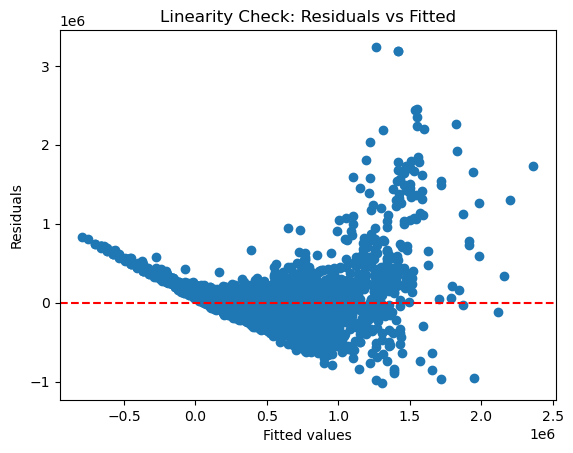

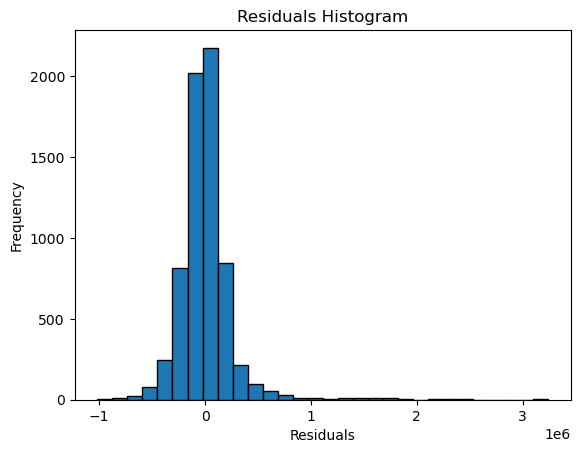

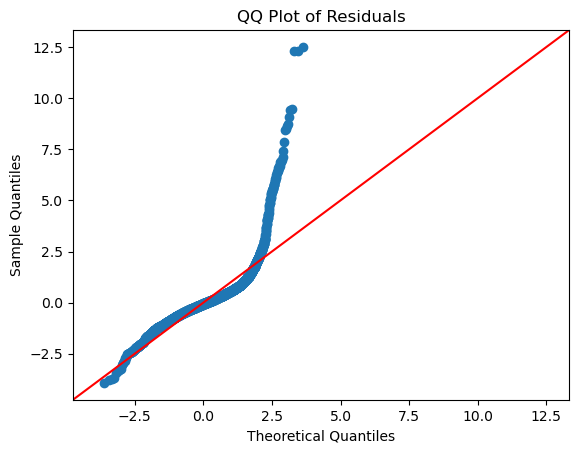

Variance Inflation Factors:
              Feature        VIF
0             car_age   7.153167
1  mileage(km/ltr/kg)   7.319479
2              engine  18.021570
3           max_power  17.093190
                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     2860.
Date:                Fri, 15 Aug 2025   Prob (F-statistic):               0.00
Time:                        20:05:07   Log-Likelihood:                -92978.
No. Observations:                6697   AIC:                         1.860e+05
Df Residuals:                    6692   BIC:                         1.860e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

car_cleaned = pd.read_csv("cleaned_cars.csv")

# 1. Selecting relevant numeric features

features = ['car_age', 'mileage(km/ltr/kg)', 'engine', 'max_power']
X = car_cleaned[features].apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(car_cleaned['selling_price'], errors='coerce')


# 2. Remove rows with missing values
X = X.dropna()
y = y.loc[X.index]  # Aligning target with predictors


# 3. Add constant for statsmodels

X_const = sm.add_constant(X)

# 4. Fit OLS model

model = sm.OLS(y, X_const).fit()


# 5. Predictions and residuals

predictions = model.predict(X_const)
residuals = y - predictions


# ASSUMPTION CHECKS

# (A) Linearity: Residuals vs Fitted Plot
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Linearity Check: Residuals vs Fitted')
plt.show()

# (B) Normality of Residuals: Histogram and QQ Plot
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()

# (C) Multicollinearity: Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factors:")
print(vif_data)


# Model Summary (Optional)
print(model.summary())


### 32. Train a Linear Regression model to predict the car’s selling price using selected features.
 Split the dataset into train/test sets, train the model, and print the coefficients and intercept.


In [37]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
car_cleaned = pd.read_csv("cleaned_cars.csv")

# Select features and target
features = ['car_age', 'mileage(km/ltr/kg)', 'engine', 'max_power']
X = car_cleaned[features]
y = car_cleaned['selling_price']

# Remove rows with missing values in X or y
data = pd.concat([X, y], axis=1).dropna()
X = data[features]
y = data['selling_price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Output coefficients and intercept
print("Intercept:", model.intercept_)
coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coeff_df)


Intercept: 143575.46153079357
              Feature   Coefficient
0             car_age -42310.235029
1  mileage(km/ltr/kg)   1465.061994
2              engine     96.023882
3           max_power   7841.554323


### 33. Evaluate your Linear Regression model using R² Score and Mean Squared Error (MSE).
 Also, explain in your own words what each metric tells you about the model’s performance.


In [38]:
from sklearn.metrics import r2_score, mean_squared_error

# Predict on test set
y_pred = model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Also calculate Root Mean Squared Error for interpretability
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


R² Score: 0.6267
Mean Squared Error (MSE): 66963092623.14
Root Mean Squared Error (RMSE): 258772.28


#### 1. R² Score = 0.6267 (~62.67%)

- This means the model explains about 62.7% of the variation in car selling prices based on the features you provided.

- **That’s moderate performance** — the model captures more than half of the pricing patterns, but there’s still a good chunk (~37%) of price variation due to factors your model doesn’t account for (e.g., brand prestige, car condition, market demand).

#### 2. Mean Squared Error (MSE) = 66,963,092,623.14

- This is the average squared difference between predicted and actual selling prices.

- Because it’s squared, the value is very large and not intuitive to interpret directly in currency terms — that’s why we often also check RMSE.

#### 3. Root Mean Squared Error (RMSE) = 258,772.28

- This is the average prediction error in the same units as your target variable (currency).

- On average, your predictions are off by about 259K from the actual selling price.

- Whether this is good depends on your dataset’s typical car prices:

- If most cars cost 1M, that’s about 25% average error, which might be acceptable for a first model.

- If most cars cost ~500K, that’s a 50% error, which is quite high.

### 34. Apply Lasso Regression on the dataset and compare its performance with Linear Regression.
 Explain what Lasso Regression does differently and why it can be useful when you have many features.


In [43]:

from sklearn.linear_model import Lasso
from math import sqrt

# 1. Train model
lasso = Lasso(alpha=0.001)

# 2. Fit the model
lasso.fit(X_train, y_train)

# 3. Predict on test set
y_pred_lasso = lasso.predict(X_test)

# 4. Calculate R² score, RMSE, MSE
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_rmse = sqrt(lasso_mse)

print(f"Lasso Regression -> R²: {lasso_r2:.4f} | RMSE: {lasso_rmse:,.2f} | MSE: {lasso_mse:,.2f}")



Lasso Regression -> R²: 0.6267 | RMSE: 258,772.28 | MSE: 66,963,092,633.05


#### Comparison

#### Performance:
- The R², MSE, and RMSE are virtually identical. This tells us that for your dataset, Lasso didn’t drop any features or significantly shrink coefficients.

#### Reason:
The dataset has only 4 features and none of them are strongly collinear or irrelevant. Lasso’s feature selection power shines in high-dimensional datasets where some predictors add little to no value.

#### Interpretation:
For small, clean datasets like this, Linear and Lasso will often produce the same performance.
For large datasets with many features, Lasso can outperform Linear Regression by removing noise features.

### 35. Apply Ridge Regression on the dataset and compare its performance with both Linear and Lasso Regression.



In [44]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Train Ridge Regression model
ridge = Ridge(alpha=1.0)  # alpha controls regularization strength
ridge.fit(X_train, y_train)

# Predict on test set
y_pred_ridge = ridge.predict(X_test)

# Calculate metrics
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)

print(f"Ridge Regression -> R²: {ridge_r2:.4f} | RMSE: {ridge_rmse:,.2f} | MSE: {ridge_mse:,.2f}")


Ridge Regression -> R²: 0.6267 | RMSE: 258,772.34 | MSE: 66,963,123,702.25


#### Discussion

#### Similarity of results
- In this case, all three models give almost identical R², RMSE, and MSE.
- This suggests that:

    1. The dataset may not have severe multicollinearity or excessive irrelevant features.

    2. The regularization effect from Lasso and Ridge is minimal with your chosen parameters (e.g., alpha=1.0 for Ridge, alpha=0.001 for Lasso).

#### Why Ridge can perform better in other cases

- Ridge Regression adds an L2 penalty (squared magnitude of coefficients) to shrink coefficients but never to zero.

- This is useful when:

    - Features are highly correlated (multicollinearity).

    - We have many features and want to reduce overfitting without feature elimination.

- Ridge tends to spread the penalty across all coefficients, keeping all features but with smaller weights.

#### Why Ridge might perform worse

- If there are many irrelevant features that don't contribute to prediction, Ridge won't remove them—it will just shrink them slightly.

- In such cases, Lasso can outperform Ridge because Lasso can push coefficients to exactly zero, effectively performing feature selection.

### 36. Use cross-validation to evaluate your Ridge Regression model.
 Explain why cross-validation gives a better estimate of model performance than a single train-test split.


In [45]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

# Create Ridge model
ridge_cv = Ridge(alpha=1.0)

# Perform 5-fold cross-validation using R² score
cv_r2_scores = cross_val_score(ridge_cv, X, y, cv=5, scoring='r2')

# Perform 5-fold cross-validation using neg_mean_squared_error (for RMSE)
cv_mse_scores = -cross_val_score(ridge_cv, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(cv_mse_scores)

# Display results
print("Cross-Validation R² Scores:", cv_r2_scores)
print("Average R²:", round(np.mean(cv_r2_scores), 4))
print("Average RMSE:", round(np.mean(cv_rmse_scores), 2))


Cross-Validation R² Scores: [0.60929396 0.62597431 0.68531617 0.60052139 0.62648446]
Average R²: 0.6295
Average RMSE: 258580.8


#### Ridge Regression cross-validation results
- The Ridge model’s performance is stable across folds, no major fluctuations between different train/test partitions.

- The consistency means the model generalizes well to unseen data and is not highly sensitive to the random split.

- The slightly higher average R² from cross-validation suggests that the original split was not overly optimistic or pessimistic, it was a fair reflection of true performance.

### 37. Plot the predicted vs actual prices for your best-performing model.
 Discuss what the plot reveals about the accuracy of your predictions.


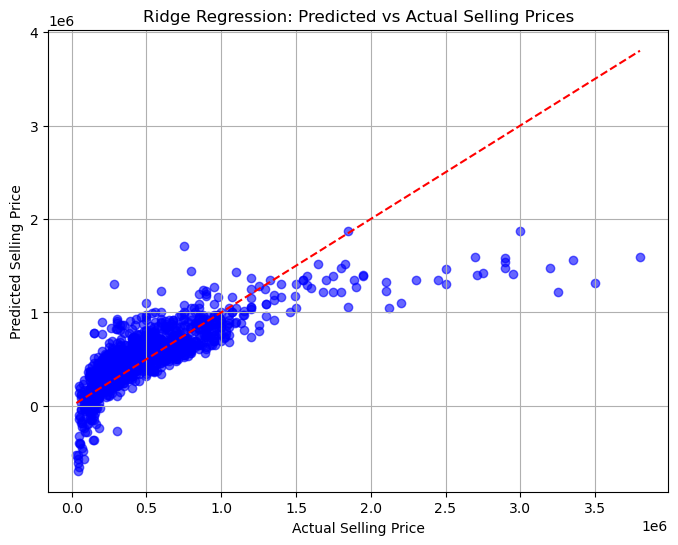

In [46]:
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_ridge = ridge.predict(X_test)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # perfect prediction line
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Ridge Regression: Predicted vs Actual Selling Prices")
plt.grid(True)
plt.show()


The plot shows that the Ridge Regression model predicts selling prices reasonably well for most cars, but with notable limitations:

- **Close fit for most cars** – Many points lie near the red dashed line, indicating accurate predictions for average-priced vehicles.

- **Underestimation of high-priced cars** – For actual prices above roughly 1.5 million, predictions tend to fall below the line, meaning the model undervalues expensive cars.

- **Overestimation in some low-price cases** – A few points at the lower end lie above the line, where the model predicts more than the actual selling price.

- **Increasing error with price** – The spread of points gets wider as actual price increases, suggesting the model is less reliable for extreme values.

### 38. Use GridSearchCV to find the best alpha value for Ridge Regression.
 Explain what alpha does in Ridge/Lasso regression and why tuning it is important.

In [47]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define Ridge model
ridge = Ridge()

# Define range of alpha values to test
alpha_values = np.logspace(-3, 3, 50)  # from 0.001 to 1000

# Create parameter grid
param_grid = {'alpha': alpha_values}

# Setup GridSearchCV
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')

# Fit on training data
grid_search.fit(X_train, y_train)

# Best alpha value
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print(f"Best alpha: {best_alpha}")
print(f"Best cross-validation R²: {best_score:.4f}")


Best alpha: 0.001
Best cross-validation R²: 0.6316


#### Interpretation

1. Very small alpha

    - Since α = 0.001 is close to zero, the optimal model applies only a tiny amount of regularization.

    - This means the dataset likely does not suffer much from overfitting or that most features are genuinely informative, so heavy penalty isn't needed.

2. Performance improvement

    - The CV R² score (0.6316) is slightly better than the earlier Ridge Regression average CV R² (≈ 0.6295).

    - This shows that even small adjustments in α can fine-tune the balance between bias and variance.

3. Why not a larger alpha?

    - Larger α values shrink coefficients more, which can reduce variance but also risk underfitting.

    - In this case, a strong penalty hurt the model’s ability to capture the complexity of the data.

### 39. Try Polynomial Regression on the dataset.
 Compare the results with Linear Regression and explain when polynomial regression might be useful.


In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create Polynomial Regression model (degree 2)
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the model
poly_model.fit(X_train, y_train)

# Predict on test set
y_pred_poly = poly_model.predict(X_test)

# Calculate metrics
poly_r2 = r2_score(y_test, y_pred_poly)
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_rmse = np.sqrt(poly_mse)

print(f"Polynomial Regression (degree={degree}) -> R²: {poly_r2:.4f} | RMSE: {poly_rmse:,.2f} | MSE: {poly_mse:,.2f}")


Polynomial Regression (degree=2) -> R²: 0.7996 | RMSE: 189,595.99 | MSE: 35,946,639,400.35


- R² increased from 0.6267 to 0.7996, meaning Polynomial Regression explains ~17% more variance in selling prices.

- RMSE decreased by ~69,000, indicating more accurate predictions on average.

- MSE dropped almost by half, suggesting the model fits the data better.

#### When Polynomial Regression is Useful

Polynomial Regression is helpful when:

- **Relationships between features and target are non-linear** — e.g., selling price may not decrease at a constant rate with car age; it could drop faster after a certain age.

- **There are interaction effects** — e.g., the effect of mileage on price may depend on engine power.

- You want to capture curvature in trends without manually creating interaction terms.

- Data patterns are complex but still smooth, where adding polynomial terms improves fit without overfitting.

### 40. Summarize your findings:
 Which model performed best (Linear, Lasso, Ridge, or Polynomial)?
 Explain why you think it performed better and what you would do next to improve predictions.


#### Best Model

Polynomial Regression performed best with:

- **Highest R² (0.7996)** — explains ~80% of the variance.

- **Lowest RMSE (~189k)** — predictions are closer to actual selling prices on average.

- **Lowest MSE** — fewer large errors compared to other models.

#### Why Polynomial Regression Performed Better

- **Captures non-linear patterns:** Car prices don’t always decrease linearly with age or mileage, polynomial terms can model this curvature.

- **Accounts for feature interactions:** It indirectly captures combined effects between features like engine size and max power.

- **Flexible model:** More adaptable to complex datasets compared to strictly linear models.

#### Next Steps to Improve Predictions

1. Feature Engineering

    - Add relevant features (e.g., brand, fuel type, transmission type) if available.

    - Create interaction terms manually if not using polynomial.

2. Regularization

    - Apply Ridge/Lasso with polynomial features to reduce overfitting risk.

3. Model Tuning

    - Experiment with polynomial degrees (e.g., degree=3) and validate via cross-validation.

4. Data Scaling & Transformation

    - Try scaling numeric features for better optimization.

    - Log-transform skewed variables (e.g., selling_price) to stabilize variance.

5. Advanced Models

- Test tree-based methods like Random Forests or Gradient Boosting, which naturally capture non-linearities without polynomial expansion.